# Zero-shot Eval for Batch Corrected Cell Embeddings

In this notebook, we processed the cell embeddings generated by different foundation models with common standard HVG selection methods, like Harmony and CCA, and then re-evaluate with zero-shot configs.

In [1]:
# Run this cell first to run the script as the root directory.
import os
import sys

project_root = os.path.dirname(os.path.abspath(''))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

## 1. Harmony

In [1]:
# Runs harmony with the cell embeddings and re-evaluate batch integration task.
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

for model in {"scGPT", "genePT-w", "genePT-s", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc/harmony_corrected_eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key',
                                      batch_correction_method="Harmony")
    print(eval.evaluate(n_cells=-1))

2025-08-03 18:48:28,551 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-08-03 18:53:54,757 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-08-03 18:53:55,221 - harmonypy - INFO - Iteration 1 of 10
2025-08-03 18:55:36,723 - harmonypy - INFO - Iteration 2 of 10
2025-08-03 18:56:59,608 - harmonypy - INFO - Iteration 3 of 10
2025-08-03 18:58:23,090 - harmonypy - INFO - Converged after 3 iterations


Using harmony corrected cell embeddings
Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.542632
1  ARI_cluster/label  cell_type  0.298908
2          ASW_label  cell_type  0.546754
3         graph_conn  cell_type  0.909393
4          ASW_batch  cell_type  0.495629
5    ASW_label/batch  cell_type  0.866499
6          PCR_batch  cell_type  0.044986
7            avg_bio  cell_type  0.462765


2025-08-03 19:20:59,966 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-08-03 19:26:04,780 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-08-03 19:26:05,249 - harmonypy - INFO - Iteration 1 of 10
2025-08-03 19:26:56,534 - harmonypy - INFO - Iteration 2 of 10
2025-08-03 19:27:41,749 - harmonypy - INFO - Iteration 3 of 10
2025-08-03 19:28:27,085 - harmonypy - INFO - Converged after 3 iterations


Using harmony corrected cell embeddings
Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.568022
1  ARI_cluster/label  cell_type  0.310347
2          ASW_label  cell_type  0.568923
3         graph_conn  cell_type  0.979168
4          ASW_batch  cell_type  0.498590
5    ASW_label/batch  cell_type  0.854294
6          PCR_batch  cell_type  0.039570
7            avg_bio  cell_type  0.482431


2025-08-03 19:42:02,127 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-08-03 19:50:09,196 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-08-03 19:50:09,731 - harmonypy - INFO - Iteration 1 of 10
2025-08-03 19:52:06,440 - harmonypy - INFO - Iteration 2 of 10
2025-08-03 19:53:59,699 - harmonypy - INFO - Converged after 2 iterations


Using harmony corrected cell embeddings
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.185508
1  ARI_cluster/label  cell_type  0.056036
2          ASW_label  cell_type  0.334076
3         graph_conn  cell_type  0.832360
4          ASW_batch  cell_type  0.467691
5    ASW_label/batch  cell_type  0.625527
6          PCR_batch  cell_type  0.006181
7            avg_bio  cell_type  0.191873


2025-08-03 20:26:55,618 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-08-03 20:28:57,113 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-08-03 20:28:58,352 - harmonypy - INFO - Iteration 1 of 10
2025-08-03 20:31:33,776 - harmonypy - INFO - Iteration 2 of 10
2025-08-03 20:33:46,782 - harmonypy - INFO - Converged after 2 iterations


Using harmony corrected cell embeddings
Evaluating genePT-s model: 103526 out of 138481 cell embeddings after filtering.
              metric      label     value
0  NMI_cluster/label  cell_type  0.081347
1  ARI_cluster/label  cell_type  0.044306
2          ASW_label  cell_type  0.481456
3         graph_conn  cell_type  0.423378
4          ASW_batch  cell_type  0.497077
5    ASW_label/batch  cell_type  0.877195
6          PCR_batch  cell_type  0.000004
7            avg_bio  cell_type  0.202370


2025-07-29 18:23:39,005 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-29 18:30:22,181 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-29 18:30:22,795 - harmonypy - INFO - Iteration 1 of 10
2025-07-29 18:32:14,903 - harmonypy - INFO - Iteration 2 of 10
2025-07-29 18:33:44,647 - harmonypy - INFO - Iteration 3 of 10
2025-07-29 18:35:08,410 - harmonypy - INFO - Converged after 3 iterations


Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 896)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'harmony_corrected_X_Geneformer'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=harmony_corrected_X_Geneformer).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'harmony_corrected_X_Geneformer'}}


2025-07-29 18:36:54,472 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-29 18:40:36,578 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-29 18:40:37,144 - harmonypy - INFO - Iteration 1 of 10
2025-07-29 18:41:29,864 - harmonypy - INFO - Iteration 2 of 10
2025-07-29 18:42:15,875 - harmonypy - INFO - Iteration 3 of 10
2025-07-29 18:43:01,222 - harmonypy - INFO - Converged after 3 iterations


Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'harmony_corrected_X_scGPT'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=harmony_corrected_X_scGPT).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'harmony_corrected_X_scGPT'}}


2025-07-29 18:44:21,687 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-29 18:55:06,399 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-29 18:55:07,074 - harmonypy - INFO - Iteration 1 of 10
2025-07-29 18:57:08,959 - harmonypy - INFO - Iteration 2 of 10
2025-07-29 18:59:14,457 - harmonypy - INFO - Converged after 2 iterations


Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'harmony_corrected_X_genePT-w'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=harmony_corrected_X_genePT-w).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'harmony_corrected_X_genePT-w'}}


2025-07-29 19:01:10,535 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-29 19:03:29,090 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-29 19:03:29,984 - harmonypy - INFO - Iteration 1 of 10
2025-07-29 19:06:10,715 - harmonypy - INFO - Iteration 2 of 10
2025-07-29 19:08:10,523 - harmonypy - INFO - Converged after 2 iterations


Evaluating genePT-s model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)
adata_ has 103526 cells. Taking a subset of 7500 cells.
neighbors in adata.uns found 
 {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'harmony_corrected_X_genePT-s'}} 
to make sure the optimal clustering is calculated for the correct embedding, removing neighbors from adata.uns.
Overwriting calculation of neighbors with sc.pp.neighbors(adata, use_rep=harmony_corrected_X_genePT-s).
neighbors in adata.uns removed, new neighbors calculated: {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'use_rep': 'harmony_corrected_X_genePT-s'}}


              metric      label     value
0  NMI_cluster/label  cell_type  0.512343
1  ARI_cluster/label  

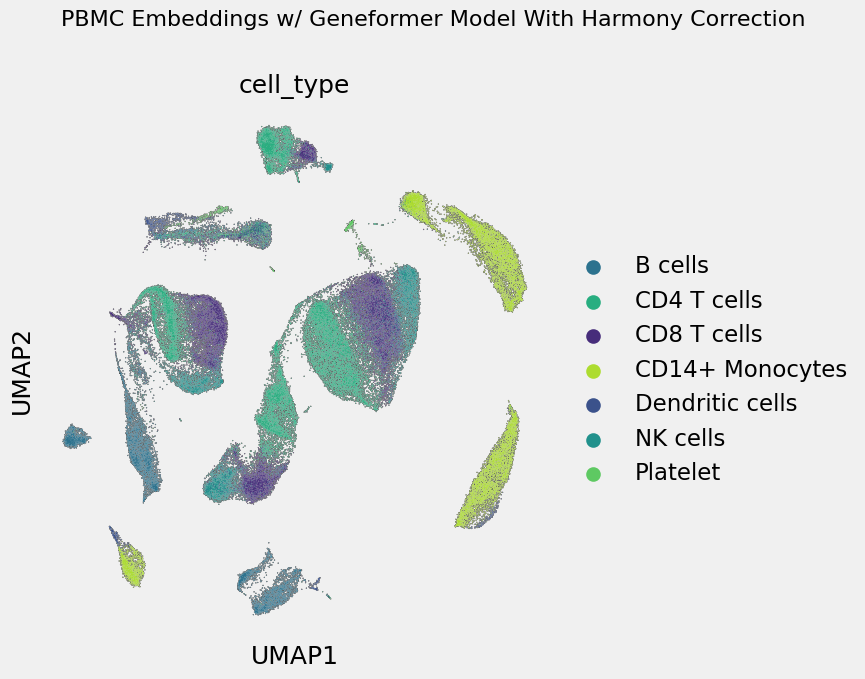

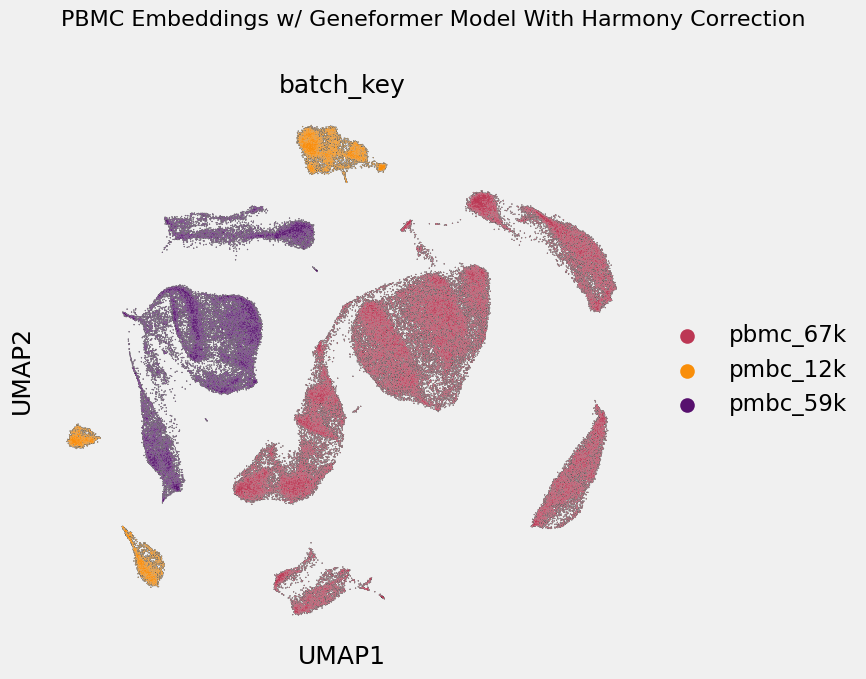

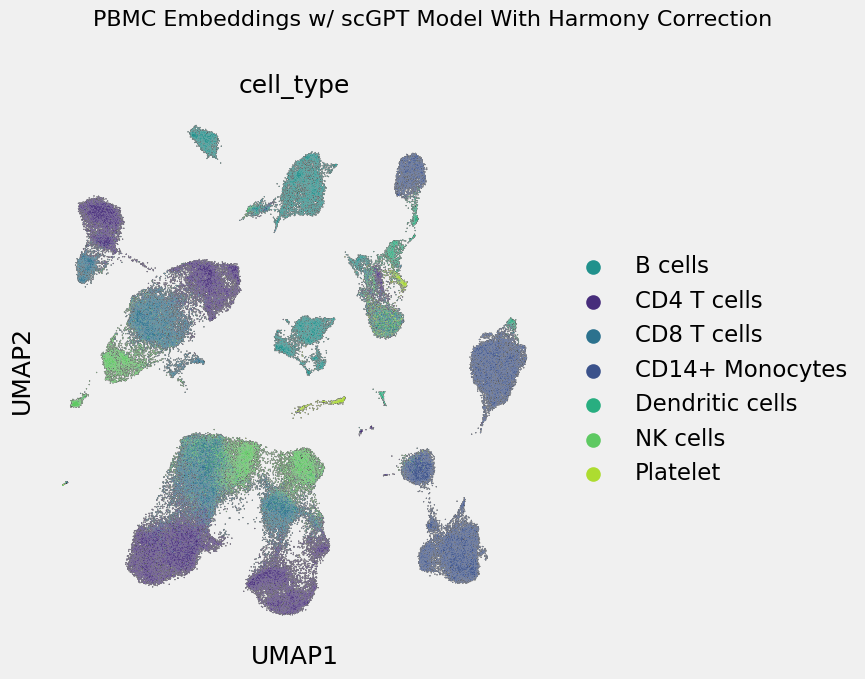

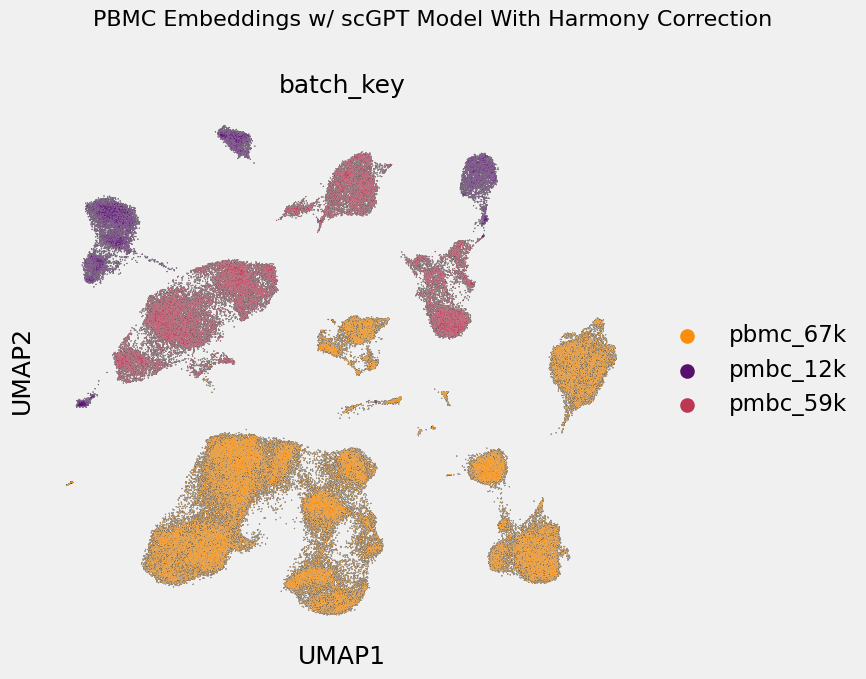

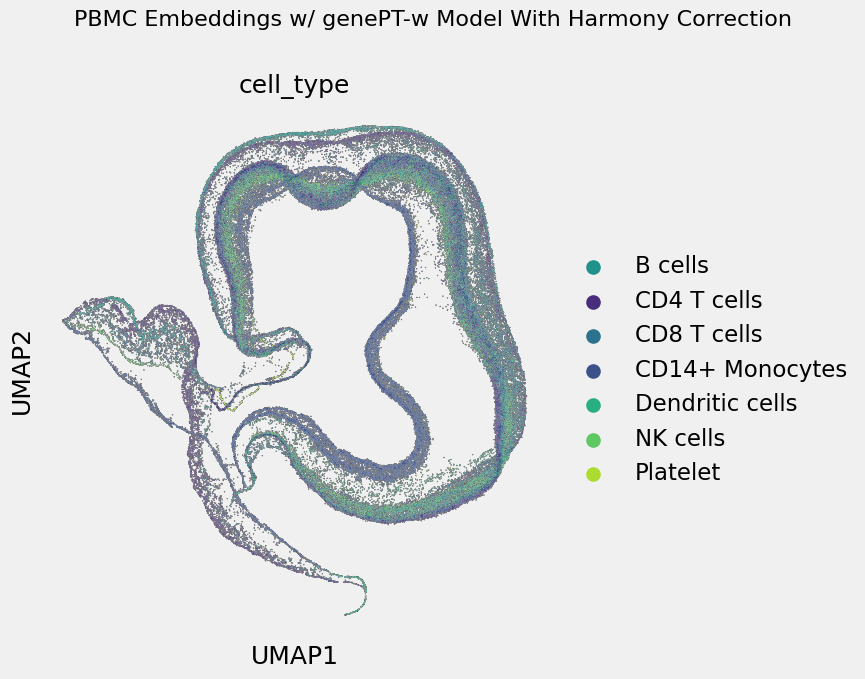

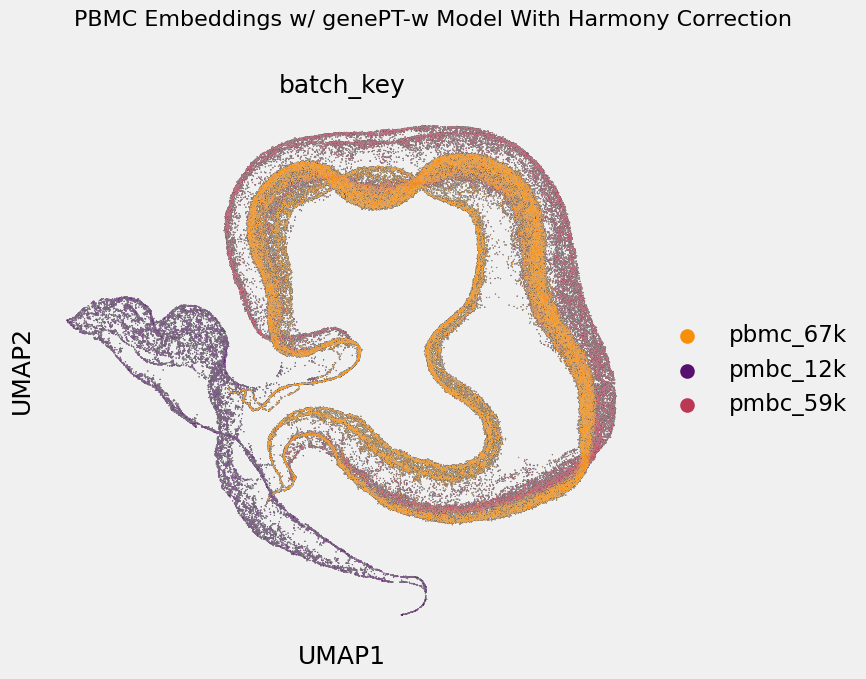

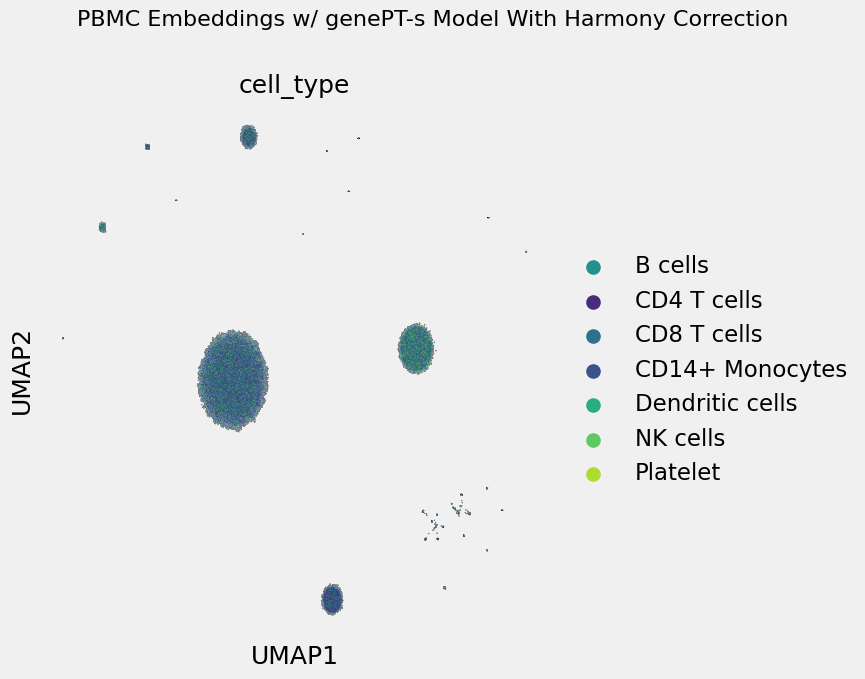

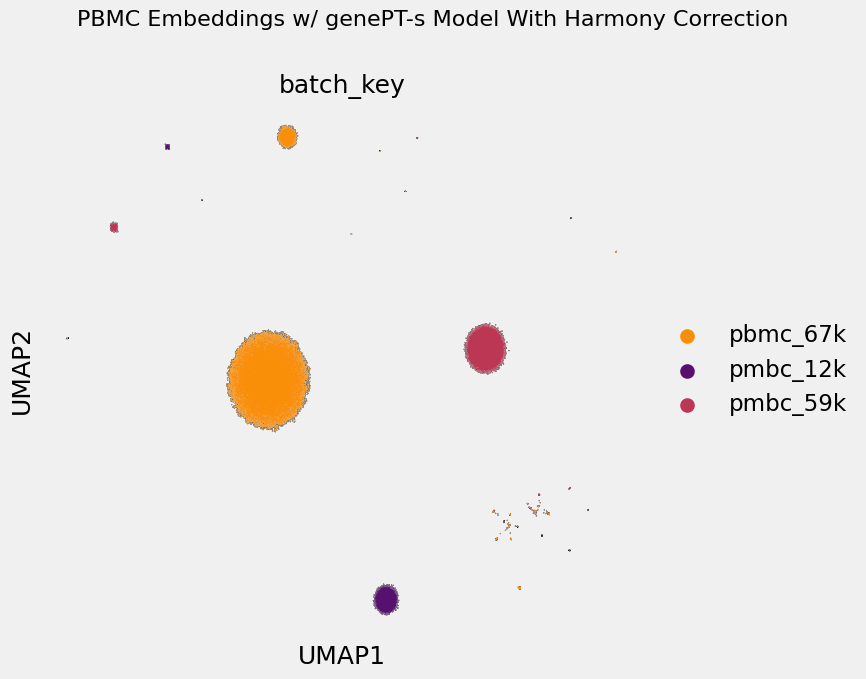

In [3]:
# Runs harmony with the cell embeddings and re-evaluate batch integration task.
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

metrics = []
for model in {"scGPT", "genePT-w", "genePT-s", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc/harmony_corrected_eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key',
                                      batch_correction_method="Harmony")
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model With Harmony Correction",
                   plot_type='scanpy',
                   n_cells=-1)
    metrics.append(eval.evaluate(n_cells=7500))

print('\n')
for metric in metrics:
    print(metric)
    print('\n')

## 2. MCCA

Using MCCA corrected cell embeddings
Evaluating Geneformer model: 28234 out of 35970 cell embeddings after filtering.
	Cell embeddings shape: (28234, 20)
Using MCCA corrected cell embeddings
Evaluating genePT-s model: 28283 out of 35970 cell embeddings after filtering.
	Cell embeddings shape: (28283, 20)
Using MCCA corrected cell embeddings
Evaluating genePT-w model: 28283 out of 35970 cell embeddings after filtering.
	Cell embeddings shape: (28283, 20)
Using MCCA corrected cell embeddings
Evaluating scGPT model: 28283 out of 35970 cell embeddings after filtering.
	Cell embeddings shape: (28283, 20)


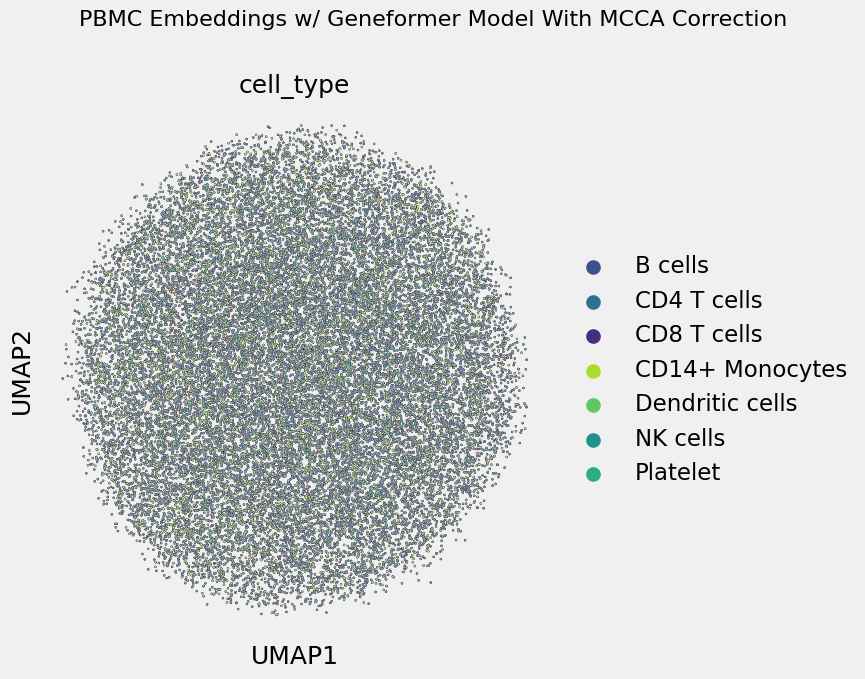

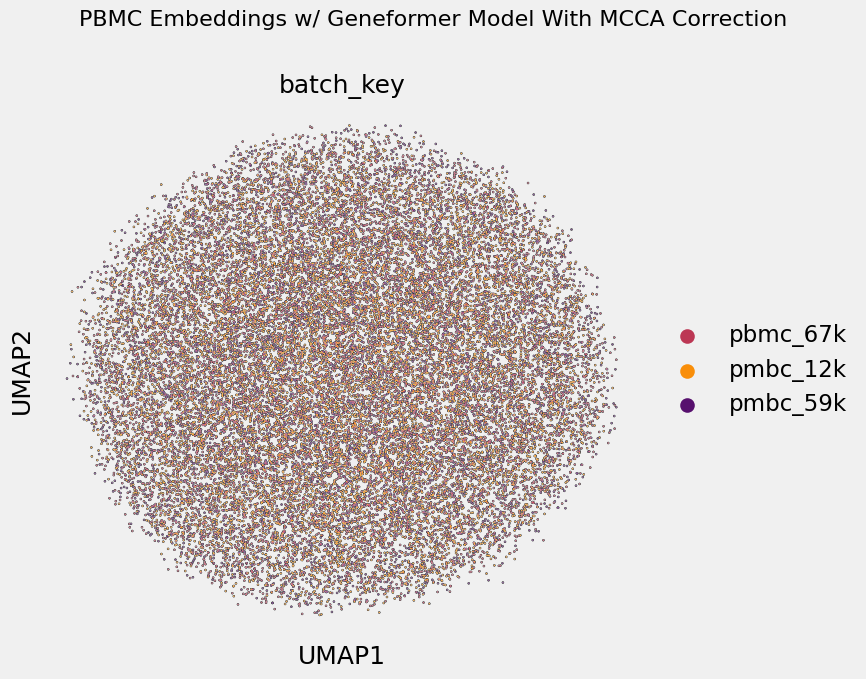

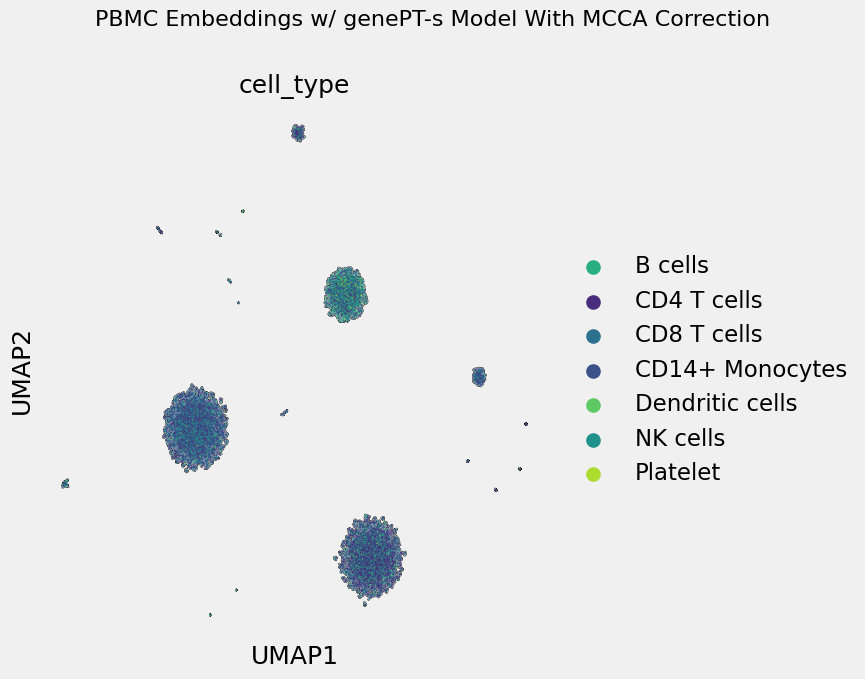

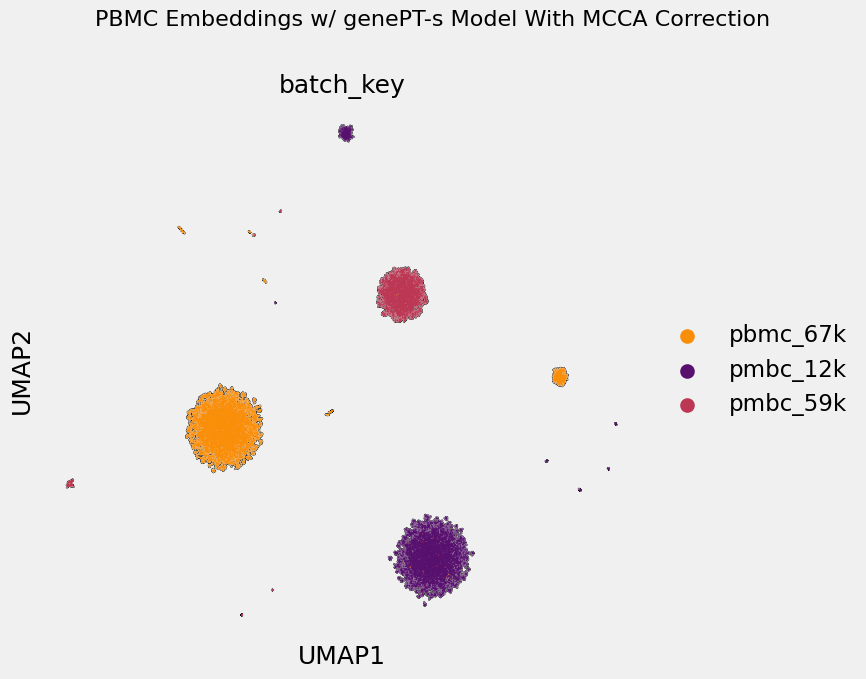

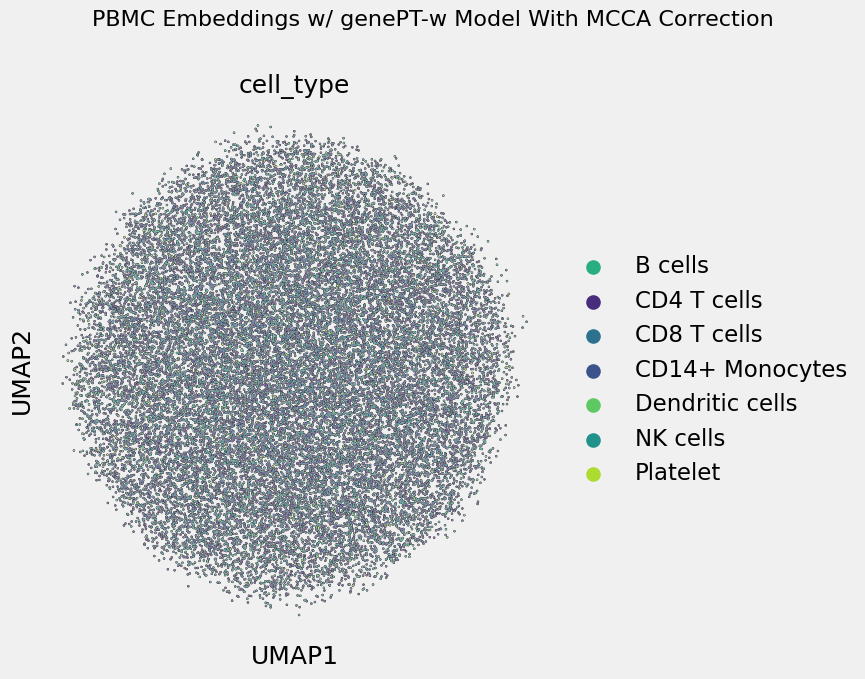

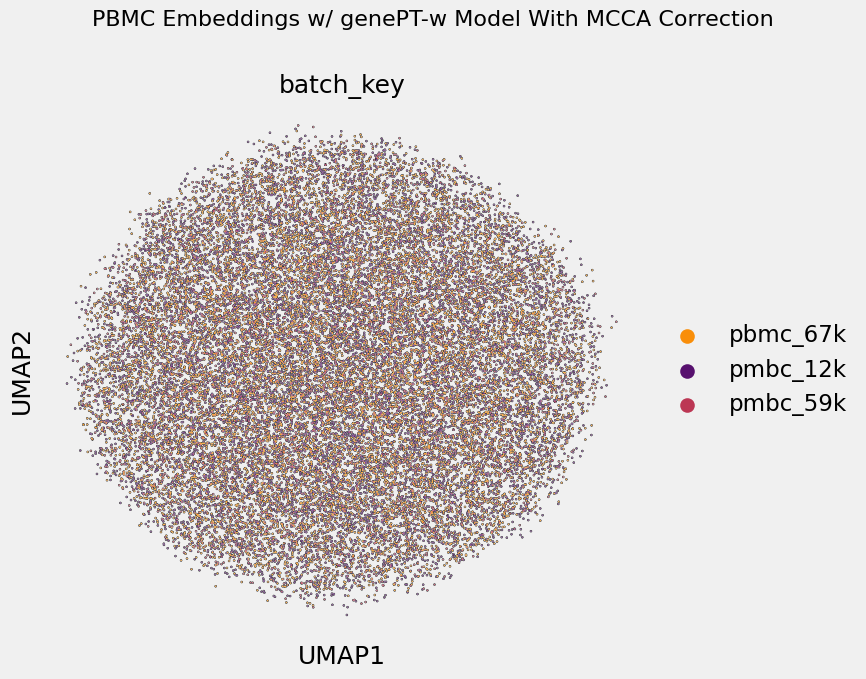

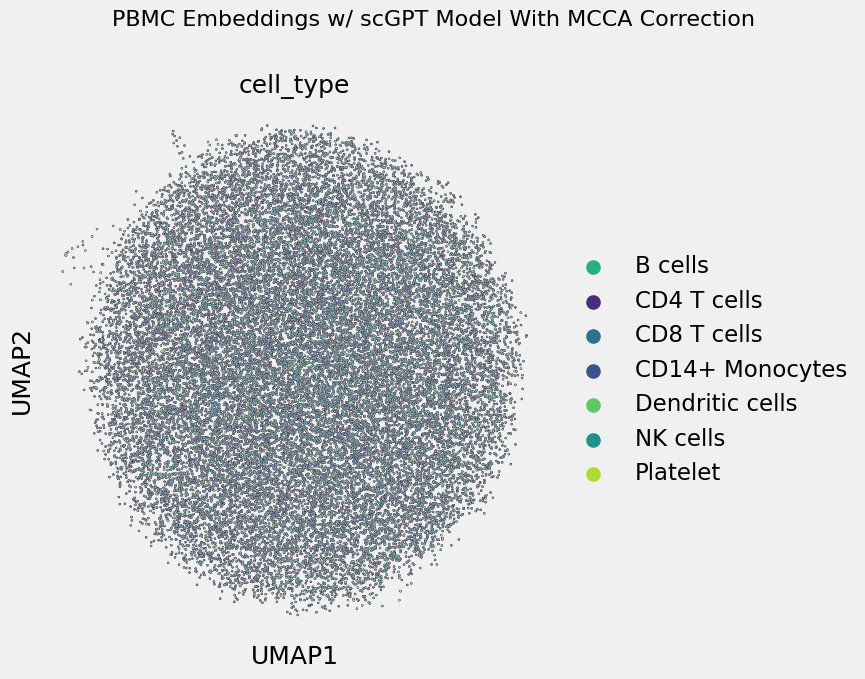

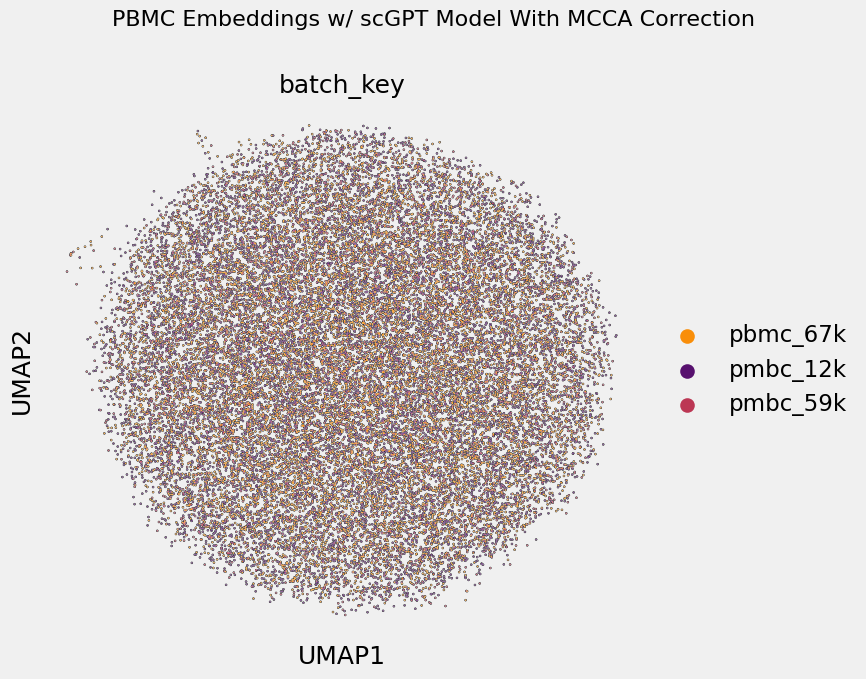

In [2]:
# Runs harmony with the cell embeddings and re-evaluate batch integration task.
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

for model in {"scGPT", "genePT-w", "genePT-s", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc/mcca_corrected_eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key',
                                      batch_correction_method="MCCA")
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model With MCCA Correction",
                   plot_type='scanpy',
                   n_cells=-1)

In [2]:
# Runs harmony with the cell embeddings and re-evaluate batch integration task.
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

metrics = []
for model in {"scGPT", "genePT-w", "genePT-s", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'../pbmc/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'../pbmc/mcca_corrected_eval/',
                                      embedding_key=f"X_{model}",
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key',
                                      batch_correction_method="MCCA")
    print(eval.evaluate(n_cells=7500))

Using MCCA corrected cell embeddings
Evaluating Geneformer model: 28234 out of 35970 cell embeddings after filtering.
adata_ has 28234 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.008158
1  ARI_cluster/label  cell_type  0.000269
2          ASW_label  cell_type  0.494895
3         graph_conn  cell_type  0.704907
4          ASW_batch  cell_type  0.498158
5    ASW_label/batch  cell_type  0.958141
6          PCR_batch  cell_type  0.000223
7            avg_bio  cell_type  0.167774
Using MCCA corrected cell embeddings
Evaluating genePT-s model: 28283 out of 35970 cell embeddings after filtering.
adata_ has 28283 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.073299
1  ARI_cluster/label  cell_type  0.044544
2          ASW_label  cell_type  0.327848
3         graph_conn  cell_type  0.501937
4          ASW_batch  cell_type  0.709911
5    ASW_label/batch  cell